# Assignment 2
### Understanding Uncertainty
### Due 9/12

**1.** 'State Bottle Retail' is the price at which the bottle is sold, while 'State Bottle Cost' is the price the state pays for a bottle.
- **1.1**: How do you define the most profitable item? Why? Explain your thinking.
- **1.2**: Use `.groupby` calculations to determine the most profitable liquors sold in Iowa.
- **1.3**: Make a plot of the top liquors.

**1.1**: I define the most profitable item as the one with the highest total profit, calculated as (Retail – Cost) × Quantity Sold. This measures the actual money the item contributes to the business, accounting for both its profit per unit and how many units are sold.

**1.2**

In [39]:
import pandas as pd
iowa = pd.read_csv('data/iowa.csv')

iowa['Profit'] = (iowa['State Bottle Retail'] - iowa['State Bottle Cost']) * iowa['Bottles Sold']
summary = iowa.groupby('Item Description')['Profit'].sum()
most_profitable = summary.sort_values(ascending=False).head(20)
print(most_profitable)


Item Description
TITOS HANDMADE VODKA                     364074.35
BLACK VELVET                             274676.85
FIREBALL CINNAMON WHISKEY                187535.22
CROWN ROYAL                              160981.95
CROWN ROYAL REGAL APPLE                  122880.40
CAPTAIN MORGAN SPICED RUM                121115.30
HAWKEYE VODKA                            116375.04
CAPTAIN MORGAN ORIGINAL SPICED           112146.71
JACK DANIELS OLD #7 BLACK LABEL          111509.09
HENNESSY VS                              108459.45
JAMESON                                  101178.98
JACK DANIELS OLD #7 BLACK LBL             93151.76
JAGERMEISTER LIQUEUR                      83029.62
JIM BEAM                                  80760.14
CROWN ROYAL CANADIAN WHISKY               68448.06
PATRON SILVER                             65958.25
ABSOLUT SWEDISH VODKA 80 PRF              63313.57
FIVE O'CLOCK VODKA                        54576.75
MALIBU COCONUT RUM                        53551.53
CAPTAIN MORGAN

**1.3**

<Axes: title={'center': 'Top Liquors'}, xlabel='Profit ($)', ylabel='Item Description'>

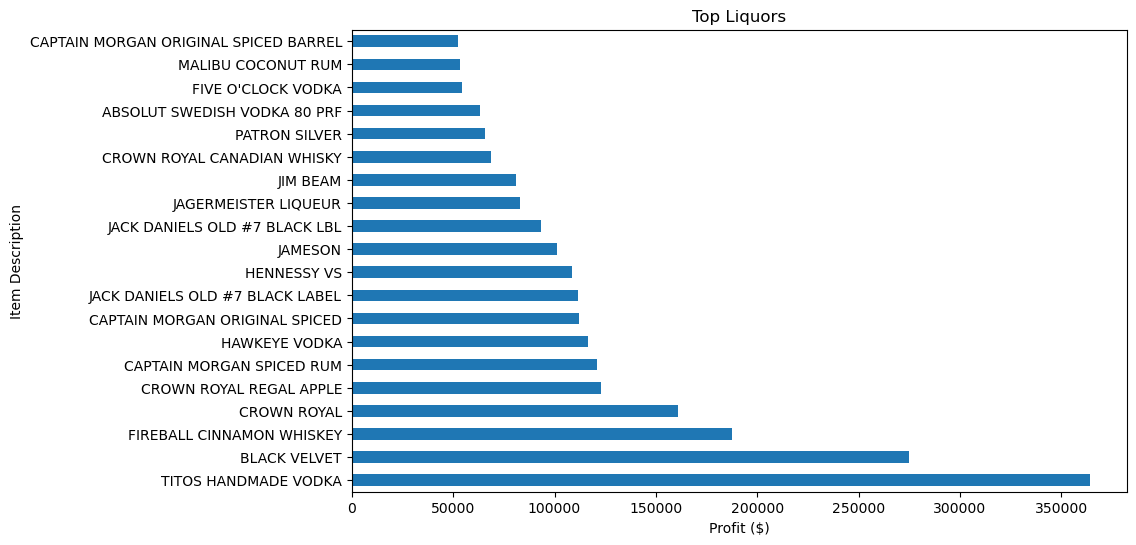

In [40]:
most_profitable.plot(kind='barh', title='Top Liquors', xlabel='Profit ($)', ylabel='Item Description', figsize=(10,6))

**2.** This question is to further explore broadcasting in NumPy.

- **2.1**: In the first code chunk below, there are two vectors, $x$ and $y$. What happens when you try to subtract them?
- **2.2**: Instead, try `x.reshape(-1,1)-y.reshape(1,-1)`. What do you get?
- **2.3**: Try `x.reshape(1,-1)-y.reshape(-1,1)`. Compare the results to your previous answer.
- **2.4**: Write two double for-loops to replicate the results of the previous two answers. 
- **2.5**: Clearly explain how `x.reshape(1,-1)` and `x.reshape(-1,1)` change $x$

In [41]:
import numpy as np

x = np.array([1,3,5])
y = np.array([2,5])

**2.1**

In [21]:
x - y

ValueError: operands could not be broadcast together with shapes (3,) (2,) 

A ValueError occurs when I try to subtract the two vectors because their shapes aren't compatible. One vector has shape (3,) and the other has shape (2,), so the elements can't align for subtraction. 

**2.2**

In [22]:
x.reshape(-1,1) - y.reshape(1,-1)

array([[-1, -4],
       [ 1, -2],
       [ 3,  0]])

**2.3**

In [23]:
x.reshape(1,-1) - y.reshape(-1,1)

array([[-1,  1,  3],
       [-4, -2,  0]])

**2.4**

In [24]:
ex1 = []
for i in range(len(x)):
    row = []
    for k in range(len(y)):
        row.append(x[i] - y[k])
    ex1.append(row)
ex1 = np.array(ex1)
ex1

array([[-1, -4],
       [ 1, -2],
       [ 3,  0]])

In [25]:
ex2 = []
for k in range(len(y)):
    row = []
    for i in range(len(x)):
        row.append(x[i] - y[k])
    ex2.append(row)
ex2 = np.array(ex2)
ex2

array([[-1,  1,  3],
       [-4, -2,  0]])

**2.5**

When `x.reshape(1,-1)` is applied to a one-dimensional array, it reshapes it into a row vector with shape (1,3) with one row and three columns. `x.reshape(-1, 1)` would reshape the same array into a column vector with shape (3,1) with three rows and one column. 

In this case where `x = np.array([1,3,5])`, `x.reshape(1,-1)` would turn it into:

[[1 3 5]]

whereas `x.reshape(-1,1)` would turn it into:

[[1]

 [3]

 [5]]

**3.** The indicator function $\mathbb{I}\{ x \le z \}$ takes the value 0 if $x>z$ is false and 1 if $x \le z$ is true.

- **3.1**: For $y = 3$, plot the indicator function for any $z$
- **3.2**: Explain how $ 1- \mathbb{I}\{ x \le z \} = \mathbb{I}\{ x > z \}$. Drawing a plot might help, or looking at the definition that
$$
\mathbb{I}\{x \le z\} = \begin{cases}
0, &x > z \\
1, &x \le z
\end{cases}
$$
- **3.3**: The code below generates a random sample for different numbers of observations, $N = 3, 30, 300, 3000 $. Write a function to compute the ECDF curve for each sample, and plot your results.
- **3.4**: Describe in your own words what happens to the ECDF qualitatively as the sample size $N$ increases

**3.1**

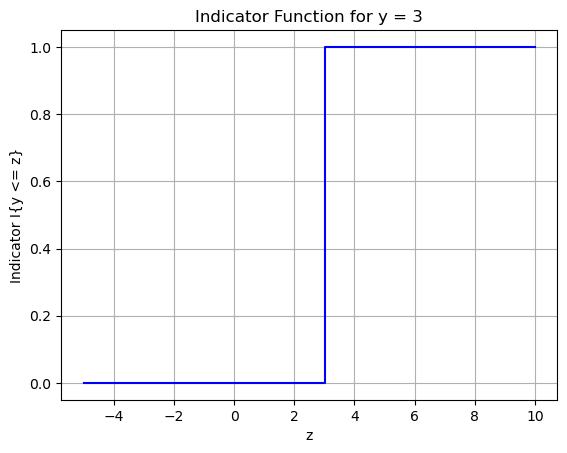

In [42]:
import numpy as np
import matplotlib.pyplot as plt

y = 3
grid = np.linspace(-5, 10, 100)
indicator = (y <= grid).astype(int)

plt.plot(grid, indicator, drawstyle="steps-post", color="blue")
plt.xlabel("z")
plt.ylabel("Indicator I{y <= z}")
plt.title("Indicator Function for y = 3")
plt.grid(True)
plt.show()


**3.2**

The indicator function $ \mathbb{I}\{ x \le z \}$ equals 1 when $x \le z$ and 0 when $x > z$. If we compute 1 - $ \mathbb{I}\{ x \le z \}$, we flip these values so it becomes 0 when $x \le z$ and 1 when $x > z$. Comparing this to $ \mathbb{I}\{ x > z \}$, which by definition is 1 when $x > z$ and 0 when $x \le z$, so we can see that the two are exactly the same. So, $1 -  \mathbb{I}\{ x \le z \}$ gives the opposite of the original indicator, which is exactly what $ \mathbb{I}\{ x > z \}$ represents.




**3.3**

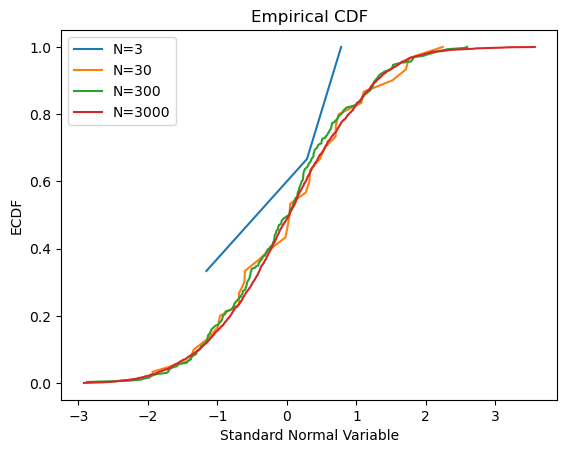

In [43]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def ecdf(data, plot = True, label=None):
    Z = np.sort(data)
    compare = data.reshape(-1,1) <= Z.reshape(1,-1)
    ecdf = np.mean(compare, axis = 0)

    if plot:
        plt.plot(Z, ecdf, label=label)

    return ecdf, Z

rng = np.random.default_rng(100)

for N in (3,30,300,3000):
    X = rng.normal(0,1,N)
    F_hat, grid = ecdf(X, label=f'N={N}')

plt.title('Empirical CDF')
plt.xlabel('Standard Normal Variable')
plt.ylabel('ECDF')
plt.legend()
plt.show()


**3.4**

As N increases, the ECDF becomes smoother and better approximates the true distribution. When N is very small, the ECDF has large steps, making the distribution look less continuous. As N grows, the steps become smaller and more frequent, reducing variability and producing a more accurate representation of the distribution.

**4**. A **quantile** generalizes the concept of the median so that instead of 50% of the mass below and 50% above, the $q$-quantile is the value for which $q$ proportion of the data are below that value and $(1-q)$ proportion of the data are above that value. This is a concept of **order**.

- **4.1**: Write a function that computes any quantile without using Numpy's `np.quantile`
- **4.2**: Write a function that computes the **Interquartile Range (IQR)** -- the .25 quantile and the .75 quantile, which brackets 50% of the data -- and the **whiskers**: $\pm 1.5 \times \text{IQR}$ from the edges of the IQR
- **4.3**: Write a function that computes a five-number summary and values for a boxplot: the minimum, the .25 quantile, the median, the .75 quantile, and the maximum, and the whiskers
- **4.4** Anything outside the whiskers is an **outlier**; write a function that returns a Boolean vector indicating if the observations are outliers.
- **4.5**: For a numeric variable of your choice from one of the datasets, apply your functions from above, and compare your answers with `sns.boxplot` and `df.describe`. 

**4.1**

In [56]:
import numpy as np

def compute_quantile(data, quantile):
    data = np.sort(np.asarray(data))
    if len(data) == 0: 
        return None
    position = quantile * (len(data)-1)
    lower_index = int(np.floor(position))
    upper_index = int(np.ceil(position))

    if lower_index == upper_index:
        return data[lower_index]
    else:
        return data[lower_index] + (position - lower_index) * (data[upper_index] - data[lower_index])

**4.2**

In [57]:
def iqr_whiskers(data, whisker_coeff = 1.5):
    q1 = compute_quantile(data, 0.25)
    q3 = compute_quantile(data, 0.75)
    iqr = q3 - q1
    low = q1 - whisker_coeff * iqr
    high = q3 + whisker_coeff * iqr
    return {"Q1": float(q1), 
            "Q3": float(q3), 
            "IQR": float(iqr),
            "Low Whisker": float(low), 
            "High Whisker": float(high)}

**4.3**

In [58]:
def five_num_summary(data):
    return {
        "Min": float(np.min(data)),
        "Q1": float(compute_quantile(data, 0.25)),
        "Median": float(compute_quantile(data, 0.5)),
        "Q3": float(compute_quantile(data, 0.75)),
        "Max": float(np.max(data))
    }

**4.4**

In [63]:
def outlier_count(data, whisker_coeff=1.5):
    whiskers = iqr_whiskers(data, whisker_coeff)
    mask = (data < whiskers["Low Whisker"]) | (data > whiskers["High Whisker"])
    return mask.sum() 

**4.5**

Five number summary: {'Min': -537770.0, 'Q1': 5700.0, 'Median': 94615.0, 'Q3': 376142.0, 'Max': 99999999.0}
IQR and Whiskers: {'Q1': 5700.0, 'Q3': 376142.0, 'IQR': 370442.0, 'Low Whisker': -549963.0, 'High Whisker': 931805.0}
Outliers: 2951

count    2.822100e+04
mean     5.882327e+05
std      3.222011e+06
min     -5.377700e+05
25%      5.700000e+03
50%      9.461500e+04
75%      3.761420e+05
max      1.000000e+08
Name: Foreign Gift Amount, dtype: float64


<Axes: xlabel='Foreign Gift Amount'>

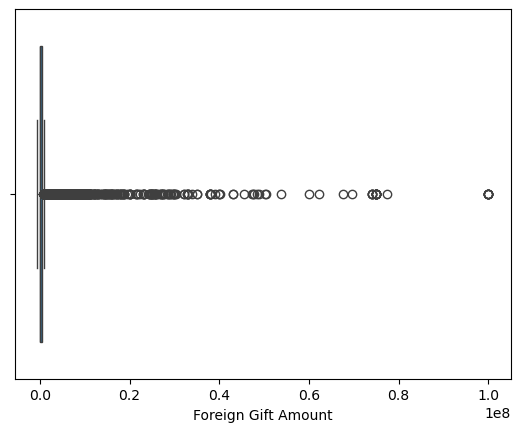

In [68]:
import pandas as pd
import seaborn as sns

foriegn_gifts = pd.read_csv('data/ForeignGifts_edu.csv')
var = foriegn_gifts['Foreign Gift Amount']

print("Five number summary:", five_num_summary(var))
print("IQR and Whiskers:", iqr_whiskers(var))
print("Outliers:", outlier_count(var))

print("")
print(var.describe())
sns.boxplot(x=var)

For the variable 'Foreign Gift Amount', my functions return results that closely align with both df.describe() and the sns.boxplot. The five-number summary (Min = –537,770, Q1 = 5,700, Median = 94,615, Q3 = 376,142, Max = 99,999,999) matches the quartiles and extremes reported by df.describe(). The IQR was calculated as 370,442, giving whisker cutoffs of approximately –549,963 and 931,805. Using these cutoffs, my function correctly identified values above 931,805 as outliers, which appear as points beyond the upper whisker in the boxplot. Interestingly, while the minimum value is negative (–537,770), it still falls within the lower whisker, so it is not flagged as an outlier. Overall, both my functions and the seaborn visualization highlight the strong right skew in this variable: the mean (~588,232) is much higher than the median (94,615), and a few extremely large foreign gifts (up to 100 million) drive the distribution.

**I think we don't have to do question 5...?**

5. The kernel density estimator captures the concentration of the data around various points, and is defined as
$$
\hat{f}_{N,h}(z) = \frac{1}{N} \sum_{i=1}^N \frac{1}{h} k \left( \frac{x_i - z}{h}\right)
$$
where $h$ is the bandwidth and $k()$ is one of the kernel functions from the class materials (Gaussian, Epanechnikov, uniform, triangular).

- Write a function that takes the bandwidth $h$ as given, and computes and plots $\hat{f}_{N,h}(z)$, for the kernels listed in the slides
- Write a function that computes the plug-in bandwidth
- Use your functions to analyze some numeric variables from a dataset of your choice, using a variety of bandwidths
- Compare bandwidths that are greater or less than the plug-in value with the results for the plug-in value. When does the KDE appear to be overfitting? Underfitting?